In [3]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import EdS
evo = EdS.evo()
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [4]:
simA = RRead.read_parameters('flrw_GRHydrowithLapse')
fA = pd.read_table(simA['datapath']+'data.csv', delimiter=',')
fA.keys()

Error in loading parameter file, check that it's in
/home/robynm/simulations/flrw_GRHydrowithLapse/output-0000/flrw_GRHydrowithLapse.par
Or
/mnt/lustre2/ET_sims/flrw_GRHydrowithLapse/output-0000/flrw_GRHydrowithLapse.par


KeyError: 'xmax'

In [3]:
simB = RRead.read_parameters('flrw_withlapse')
fB = pd.read_table(simB['datapath']+'data.csv', delimiter=',')
fB.keys()

Index(['Iteration', 'Time', 'gxx', 'kxx', 'alp', 'dtalp', 'rho', 'trK', 'A',
       'H'],
      dtype='object')

In [4]:
simC = RRead.read_parameters('flrw_withCosmoLapse')
fC = pd.read_table(simC['datapath']+'data.csv', delimiter=',')
fC.keys()

Index(['Iteration', 'Time', 'gxx', 'kxx', 'alp', 'dtalp', 'rho', 'trK', 'A',
       'H'],
      dtype='object')

In [5]:
def get_time(f):
    time = [f['Time'][0]]
    for i in range(1, len(f['Time'])):
        dt = f['Time'][i] - f['Time'][i - 1]
        time += [time[i-1] + f['alp'][i-1]*dt]
    return np.array(time)
timeA = get_time(fA)
timeB = get_time(fB)
timeC = get_time(fC)

(5e-05, 0.0015)

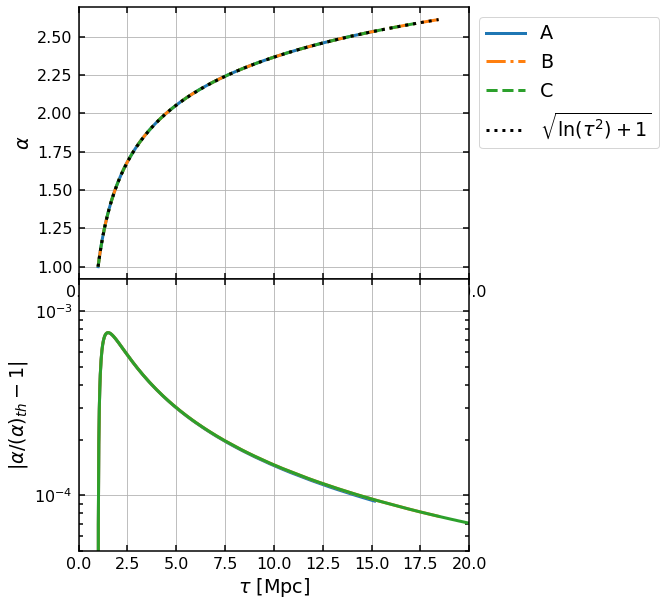

In [19]:
plt.figure(figsize=(7,10))

plt.subplot(211)
plt.plot(timeA, fA['alp'], linestyle = '-', label='A')
plt.plot(timeB, fB['alp'], linestyle = '-.', label='B')
plt.plot(timeC[:-300], fC['alp'][:-300], linestyle = '--', label='C')
plt.plot(timeB, np.sqrt(np.log(timeB**2)+fB['alp'][0]), color='k', linestyle=':', label=r'$\sqrt{\ln(\tau^2)+1}$')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\tau$'+' [Mpc]')
plt.subplots_adjust(hspace=0)
plt.xlim(0, 20)

plt.subplot(212)
plt.semilogy(timeA, abs(fA['alp']/(np.sqrt(np.log(timeA**2)+fB['alp'][0]))-1), linestyle = '-', label='A')
plt.semilogy(timeB, abs(fB['alp']/(np.sqrt(np.log(timeB**2)+fB['alp'][0]))-1), linestyle = '-', label='B')
plt.semilogy(timeC, abs(fC['alp']/(np.sqrt(np.log(timeC**2)+fB['alp'][0]))-1), linestyle = '-', label='C')
plt.grid()
plt.ylabel(r'$|\alpha / (\alpha)_{th} - 1 |$')
plt.xlabel(r'$\tau$'+' [Mpc]')
plt.subplots_adjust(hspace=0)
plt.xlim(0, 20)
plt.ylim(5e-5, 1.5e-3)

(0.0, 20.0)

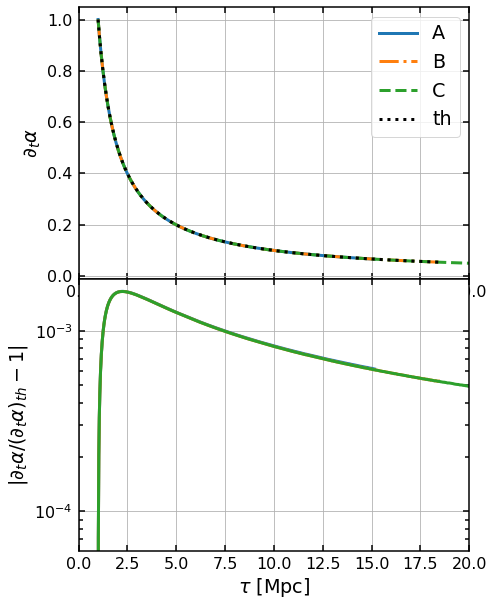

In [6]:
plt.figure(figsize=(7,10))

plt.subplot(211)
plt.plot(timeA, fA['dtalp'], linestyle = '-', label='A')
plt.plot(timeB, fB['dtalp'], linestyle = '-.', label='B')
plt.plot(timeC, fC['dtalp'], linestyle = '--', label='C')
plt.plot(timeB, 1.5 * evo.Hprop(timeB), color='k', linestyle=':', label='th')
plt.grid()
plt.legend()
plt.ylabel(r'$\partial_t \alpha$')
plt.xlim(0, 20)

plt.subplot(212)
plt.semilogy(timeA, abs(fA['dtalp']/(1.5 * evo.Hprop(timeA)) - 1), linestyle = '-', label='A')
plt.semilogy(timeB, abs(fB['dtalp']/(1.5 * evo.Hprop(timeB)) - 1), linestyle = '-', label='B')
plt.semilogy(timeC, abs(fC['dtalp']/(1.5 * evo.Hprop(timeC)) - 1), linestyle = '-', label='C')
plt.grid()
plt.ylabel(r'$|\partial_t \alpha / (\partial_t \alpha)_{th} - 1 |$')
plt.xlabel(r'$\tau$'+' [Mpc]')
plt.subplots_adjust(hspace=0)
plt.xlim(0, 20)

(0.0, 20.0)

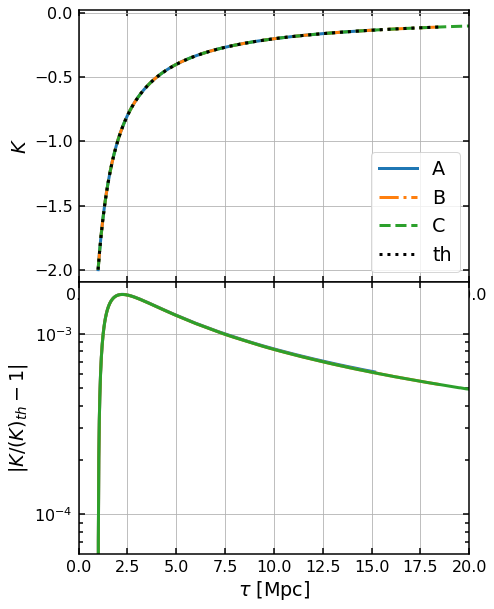

In [7]:
plt.figure(figsize=(7,10))

plt.subplot(211)
plt.plot(timeA, fA['trK'], linestyle = '-', label='A')
plt.plot(timeB, fB['trK'], linestyle = '-.', label='B')
plt.plot(timeC, fC['trK'], linestyle = '--', label='C')
plt.plot(timeB, - 3 * evo.Hprop(timeB), color='k', linestyle=':', label='th')
plt.grid()
plt.legend()
plt.ylabel(r'$K$')
plt.xlim(0, 20)

plt.subplot(212)
plt.semilogy(timeA, abs(fA['trK']/(- 3 * evo.Hprop(timeA)) - 1), linestyle = '-', label='A')
plt.semilogy(timeB, abs(fB['trK']/(- 3 * evo.Hprop(timeB)) - 1), linestyle = '-', label='B')
plt.semilogy(timeC, abs(fC['trK']/(- 3 * evo.Hprop(timeC)) - 1), linestyle = '-', label='C')
plt.grid()
plt.ylabel(r'$|K / (K)_{th} - 1 |$')
plt.xlabel(r'$\tau$'+' [Mpc]')
plt.subplots_adjust(hspace=0)
plt.xlim(0, 20)

(0.0, 20.0)

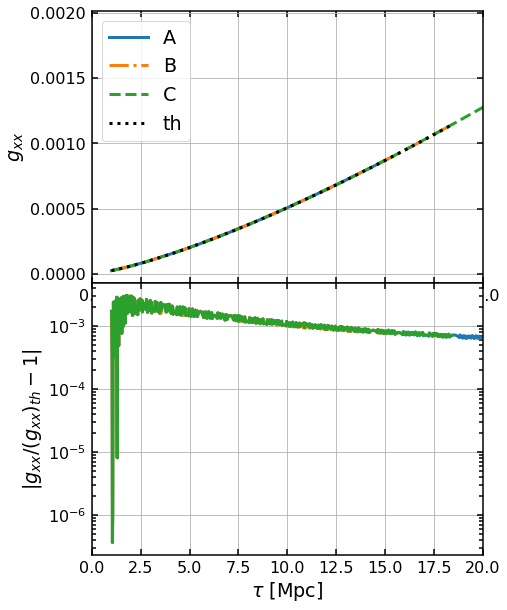

In [8]:
plt.figure(figsize=(7,10))

plt.subplot(211)
plt.plot(timeA, fA['gxx'], linestyle = '-', label='A')
plt.plot(timeB, fB['gxx'], linestyle = '-.', label='B')
plt.plot(timeC, fC['gxx'], linestyle = '--', label='C')
plt.plot(timeB, evo.a(timeB)**2, color='k', linestyle=':', label='th')
plt.grid()
plt.legend()
plt.ylabel(r'$g_{xx}$')
plt.xlim(0, 20)

plt.subplot(212)
plt.semilogy(timeC, abs(fC['gxx']/(evo.a(timeC)**2) - 1), linestyle = '-', label='C')
plt.semilogy(timeA, abs(fA['gxx']/(evo.a(timeA)**2) - 1), linestyle = '-', label='A')
plt.semilogy(timeB, abs(fB['gxx']/(evo.a(timeB)**2) - 1), linestyle = '-', label='B')
plt.grid()
plt.ylabel(r'$|g_{xx} / (g_{xx})_{th} - 1 |$')
plt.xlabel(r'$\tau$'+' [Mpc]')
plt.subplots_adjust(hspace=0)
plt.xlim(0, 20)

Text(0.5, 0, '$\\tau$ [Mpc]')

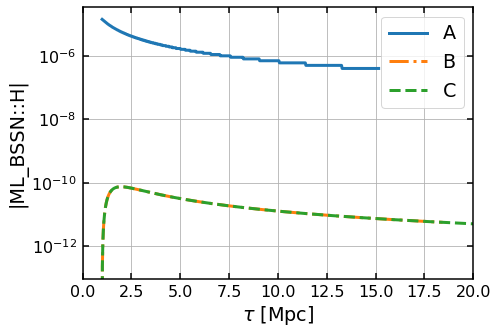

In [9]:
plt.figure(figsize=(7,5))
plt.semilogy(timeA, abs(fA['H']), linestyle = '-', label='A')
plt.semilogy(timeB, abs(fB['H']), linestyle = '-.', label='B')
plt.semilogy(timeC, abs(fC['H']), linestyle = '--', label='C')
plt.grid()
plt.legend()
plt.ylabel('|ML_BSSN::H|')
plt.xlim(0, 20)
plt.xlabel(r'$\tau$'+' [Mpc]')